In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

$\frac{\partial u}{\partial t} - \frac{\partial^2u}{\partial x^2} = 0$,      $0\leq x \leq \pi,t\geq 0$  
$u(x,0) = \sin(x)$ :$IC$  
$u(0,t) = u(\pi, t) = 0$, $t\geq 0$ :$BC$

# Setting up

In [2]:
t_0, t_n = 0, 5
x_0, x_n = 0, np.pi

In [3]:
def make_hx(h_t):
    return np.sqrt(2*h_t)

def make_L(n_x):
    L = np.eye(n_x) * 2 - np.eye(n_x, k=1) - np.eye(n_x, k=-1)
    return L

In [4]:
search_resolution = 0.05
h_ts = np.linspace(0.1, 0.5, int(t_n/search_resolution))

h_xs = make_hx(h_ts)
x_grids = [np.linspace(x_0, x_n, int(x_n/h_x)) for h_x in h_xs]

In [ ]:
u_grids= []

def get_u_grid(h_x, h_t, x_grid, t_grid):
    n_x = len(x_grid)
    L = make_L(n_x)
    A = (np.eye(n_x) - (h_t/(h_x**2))*L)
    
    u_grid = [np.sin(x_grid)]
    [u_grid.append(A @ u_grid[-1]) for _ in t_grid]
    return np.column_stack(u_grid)

for h_t, h_x, x_grid in tqdm(zip(h_ts, h_xs, x_grids)):
    x_grid = np.linspace(x_0, x_n, int(x_n/h_x))[1:-1]
    t_grid = np.linspace(t_0, t_n, int(t_n/h_t))[1:-1]
    u_grids.append((x_grid, t_grid, get_u_grid(h_x, h_t, x_grid, t_grid), h_x, h_t))

100it [00:00, 7527.33it/s]


# Error calculation setup

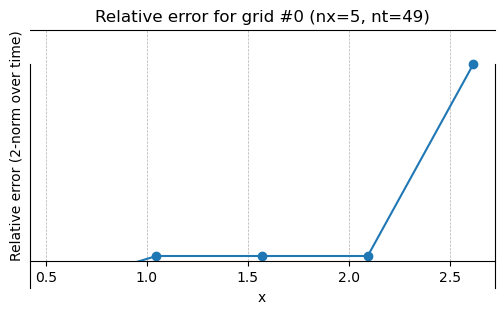

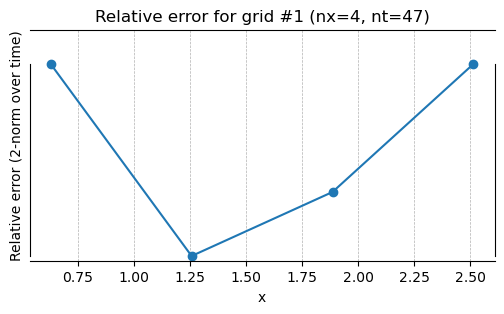

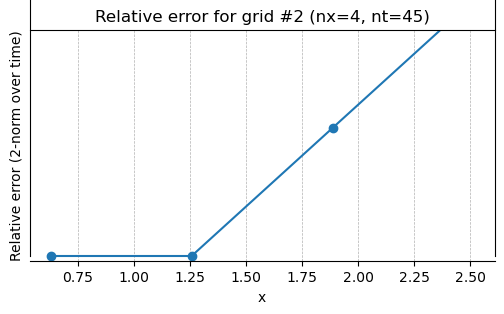

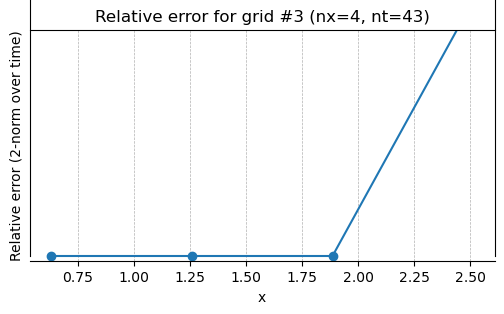

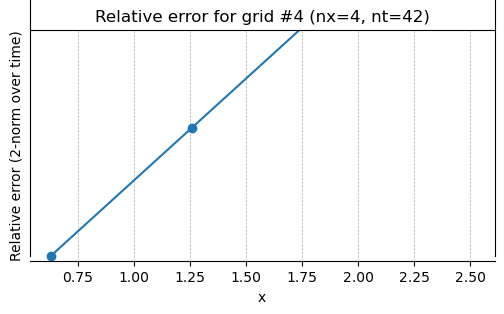

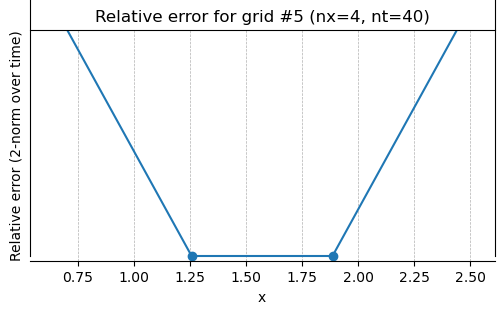

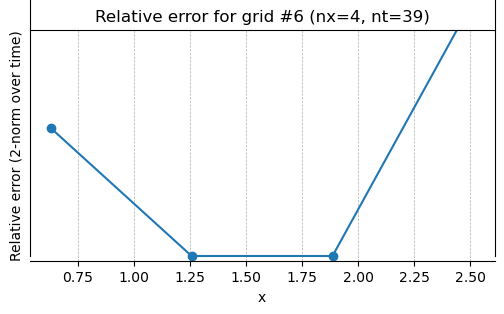

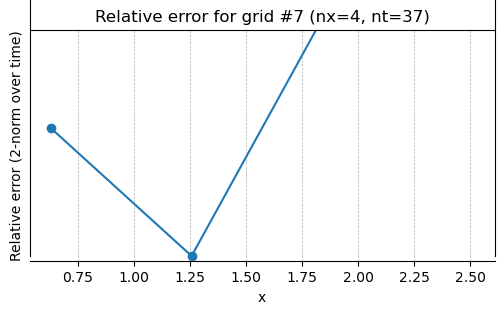

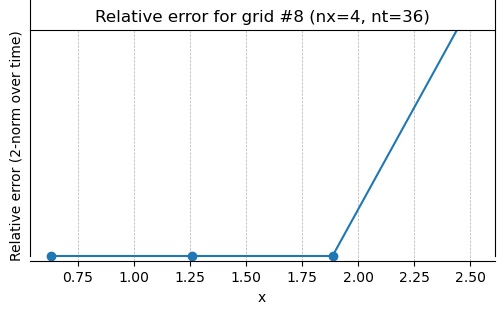

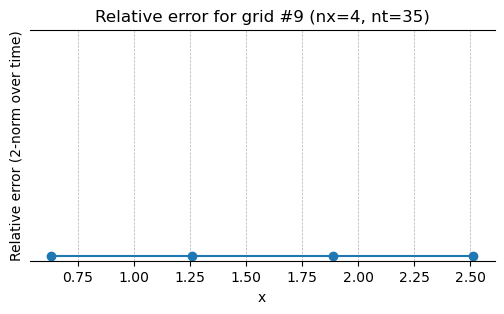

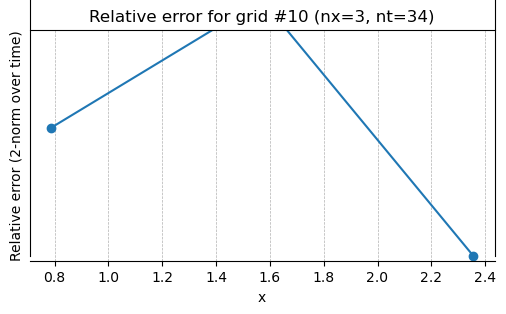

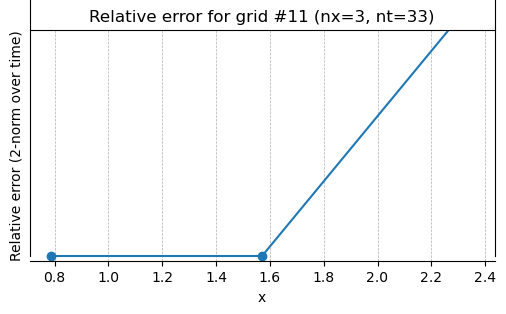

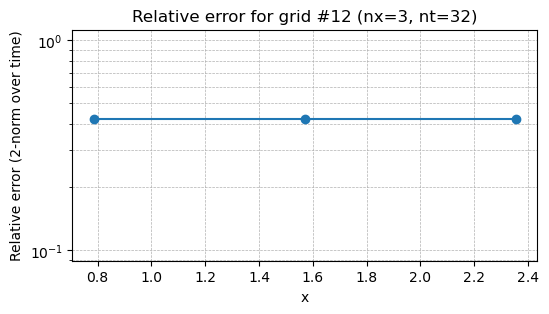

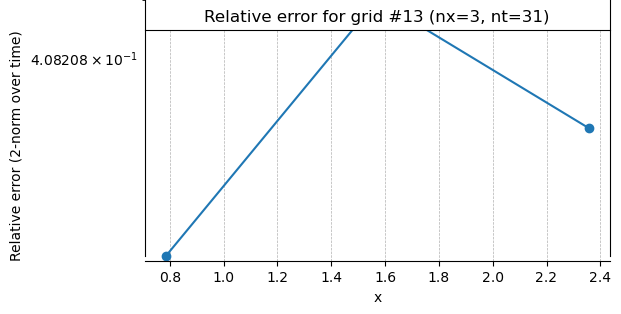

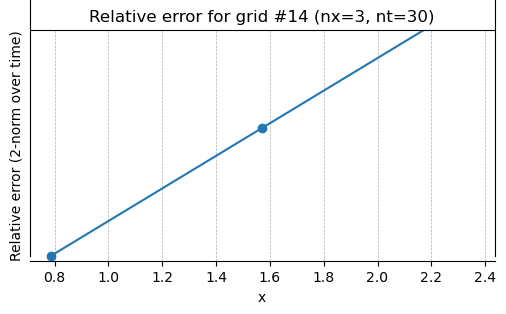

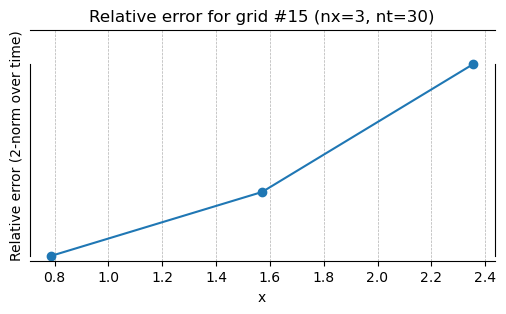

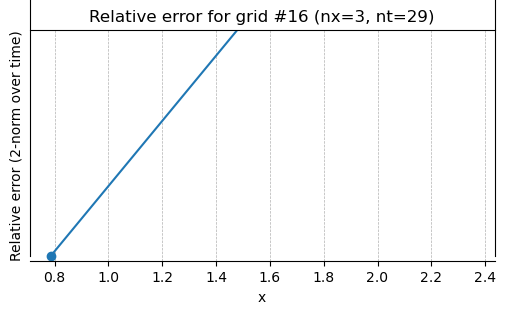

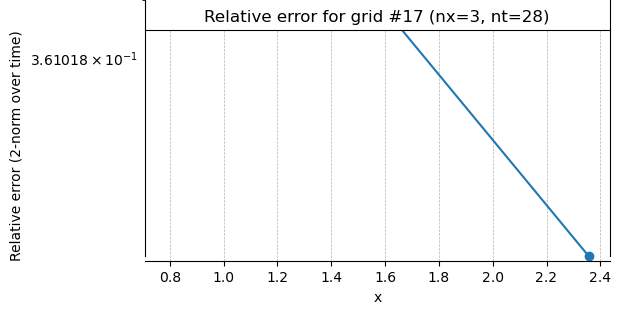

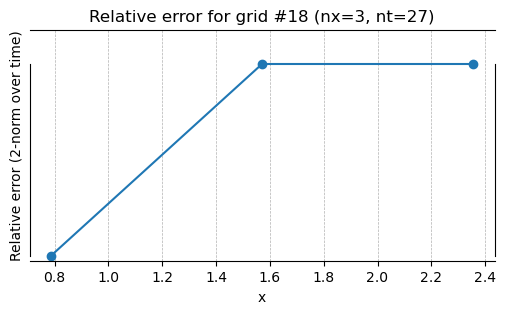

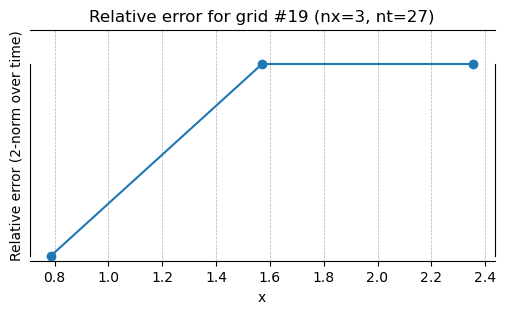

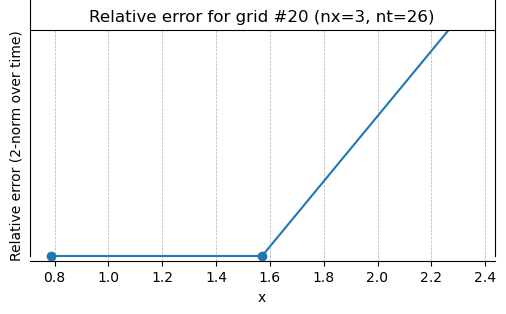

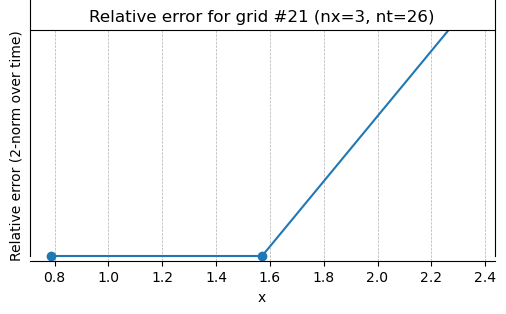

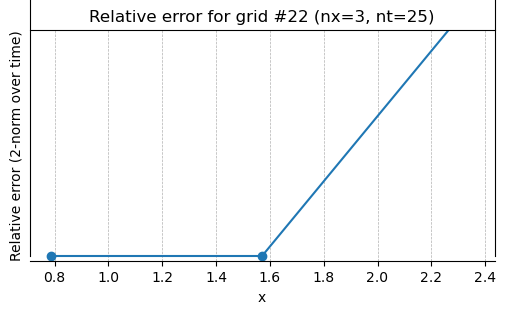

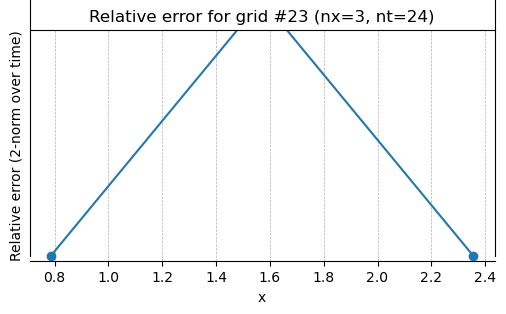

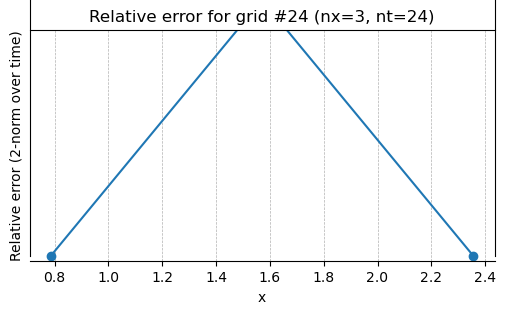

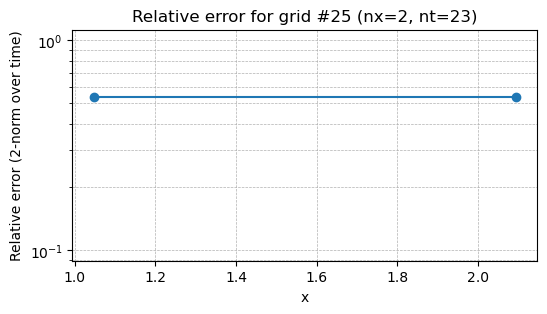

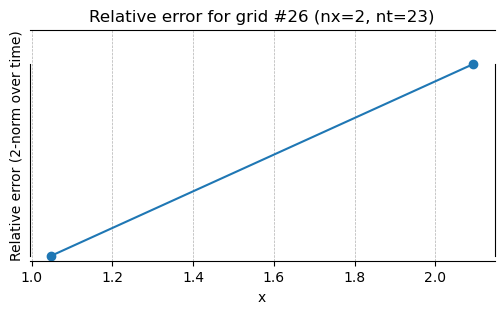

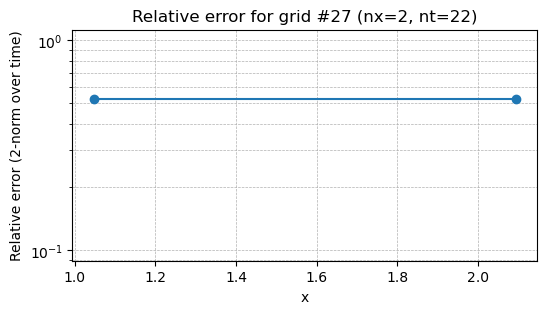

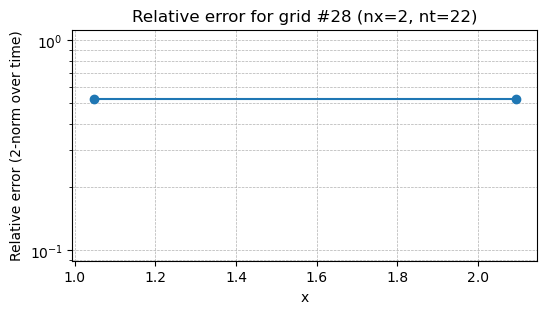

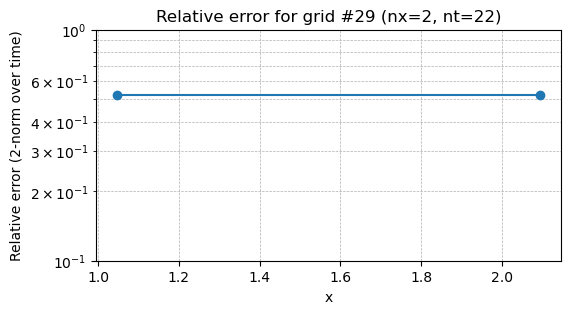

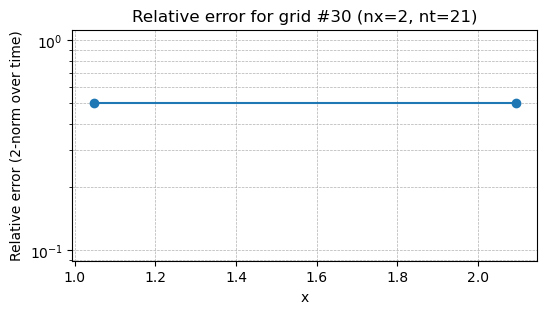

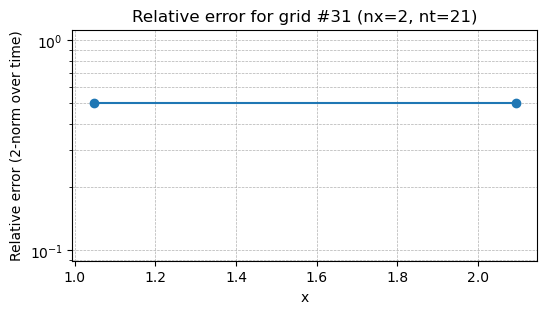

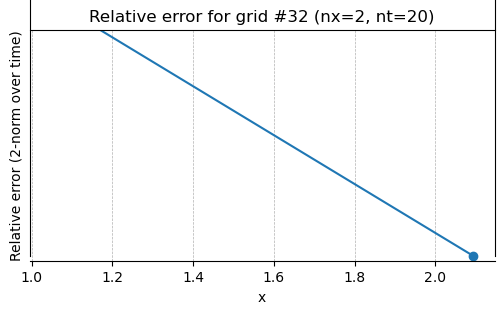

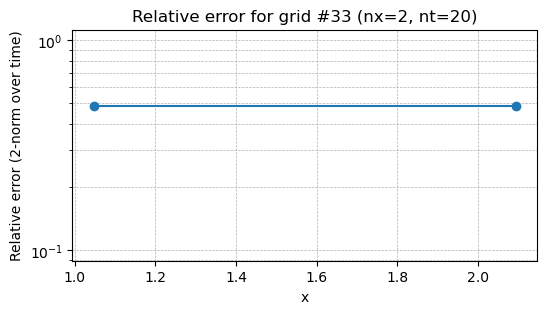

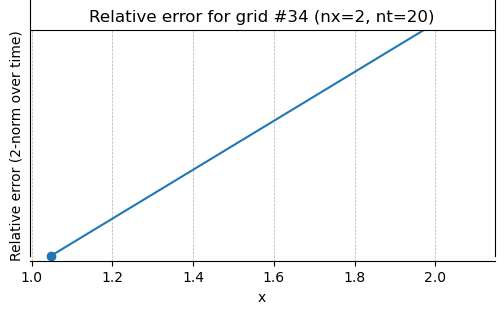

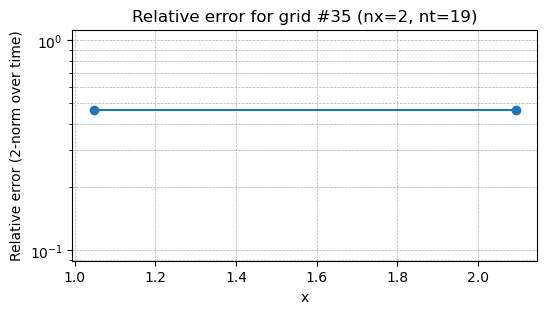

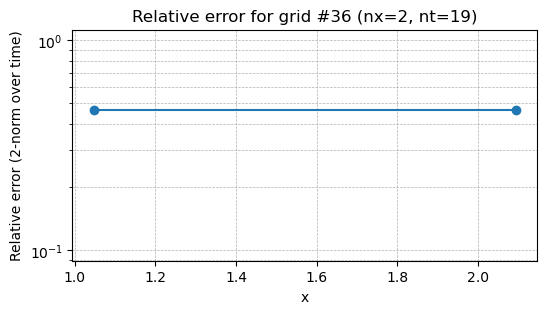

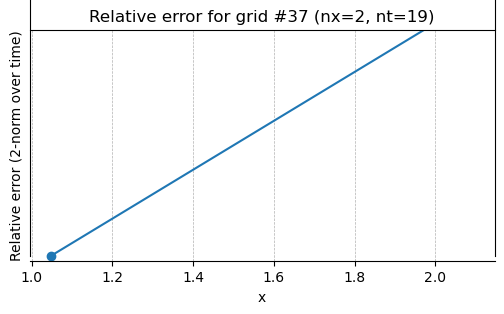

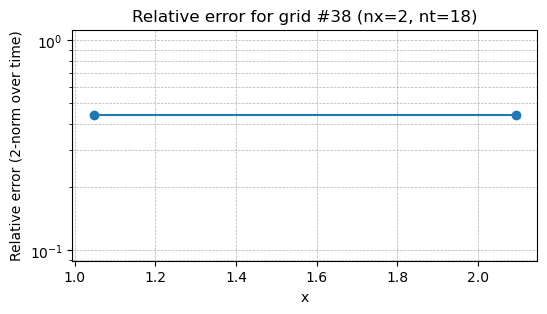

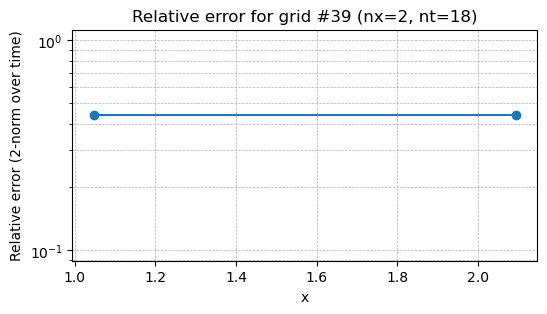

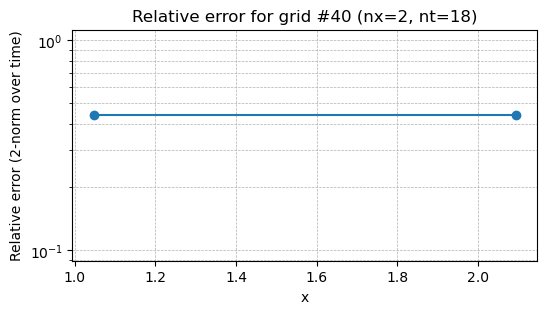

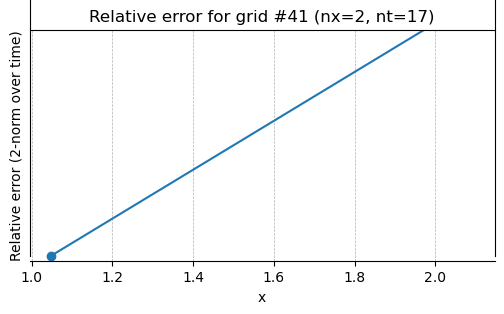

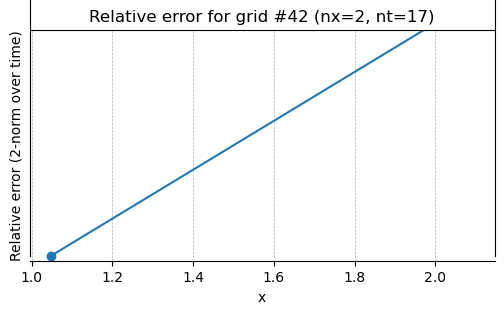

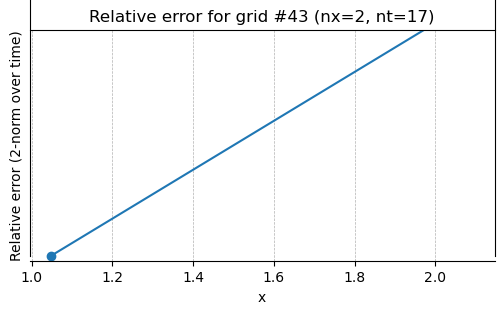

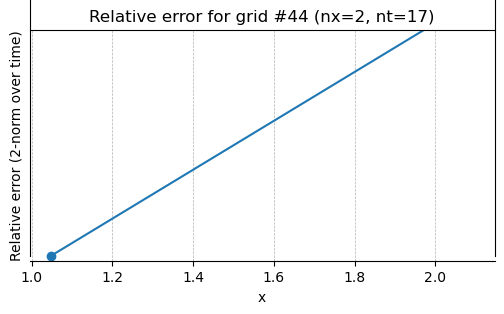

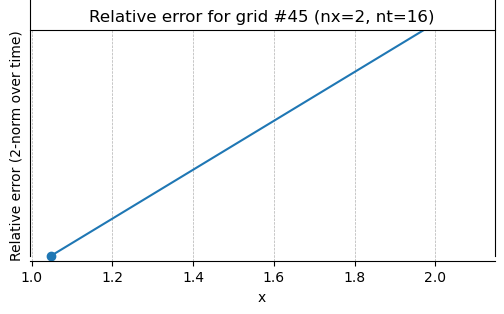

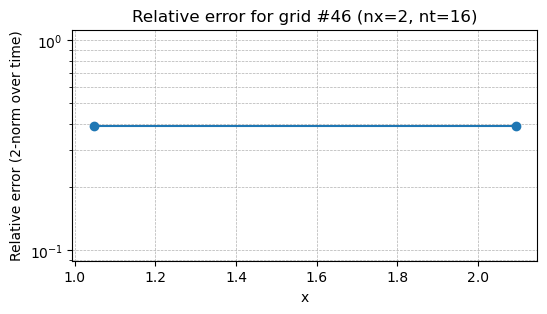

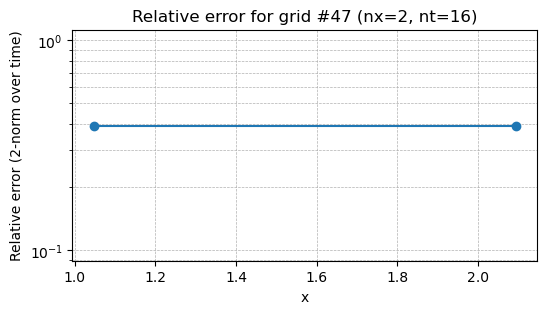

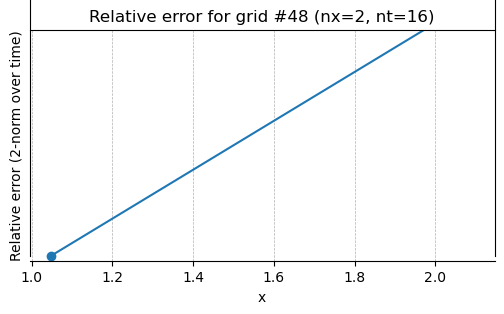

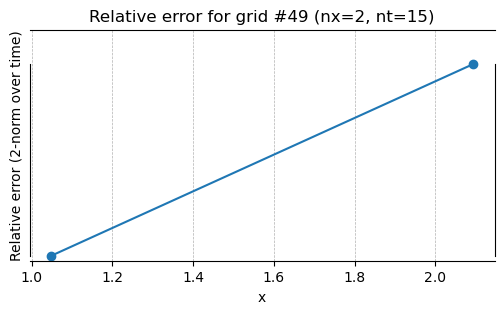

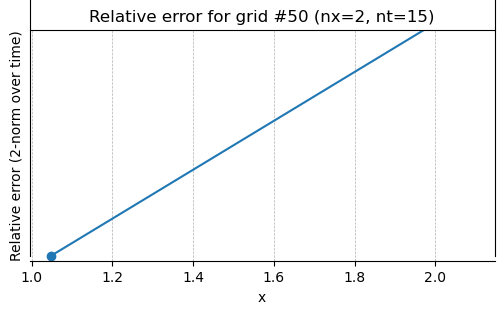

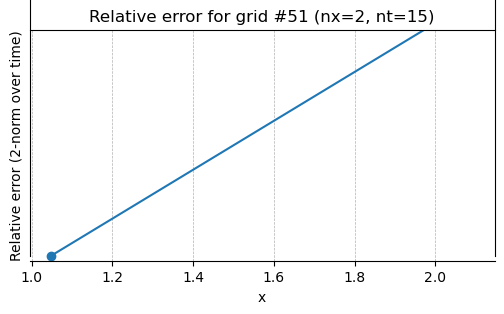

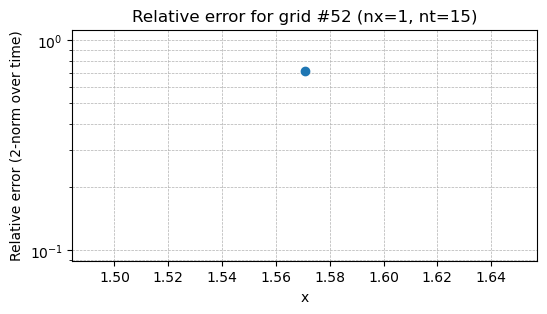

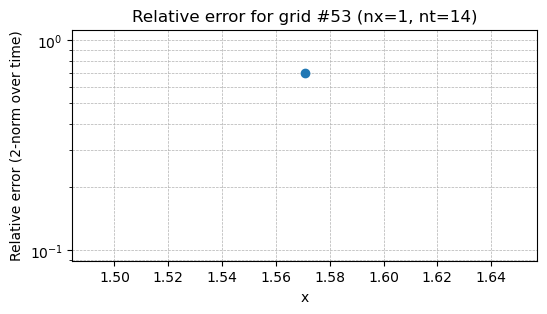

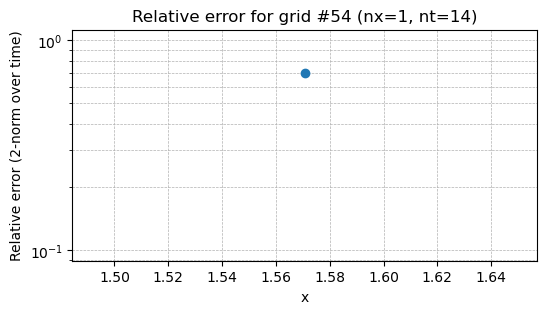

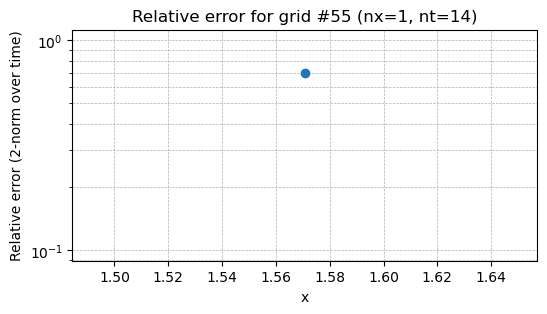

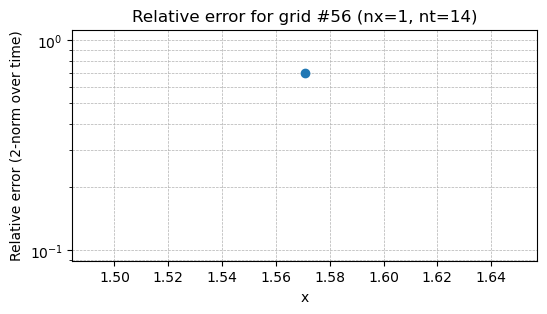

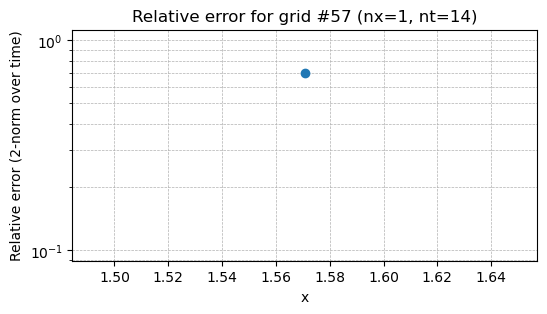

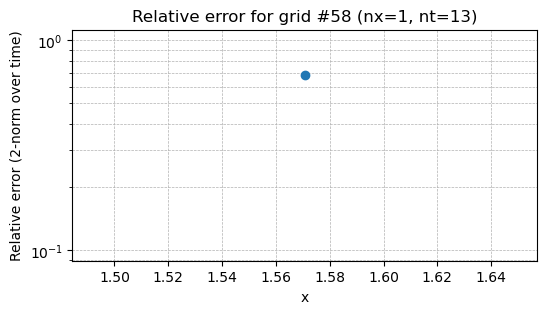

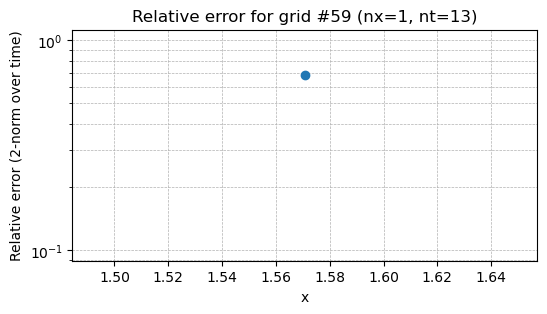

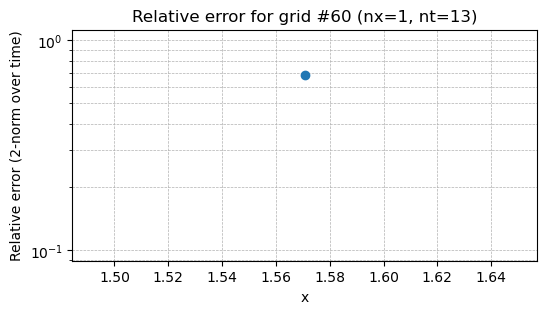

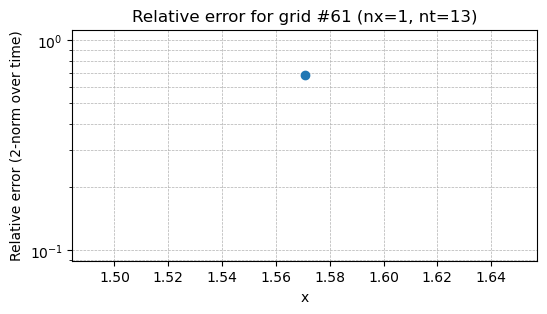

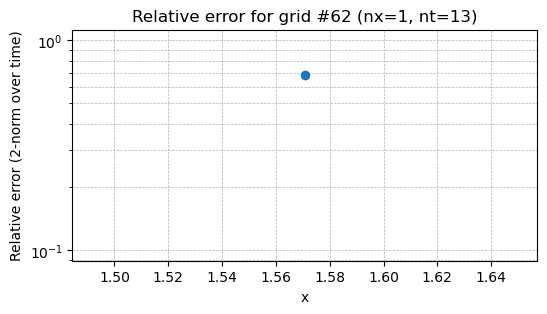

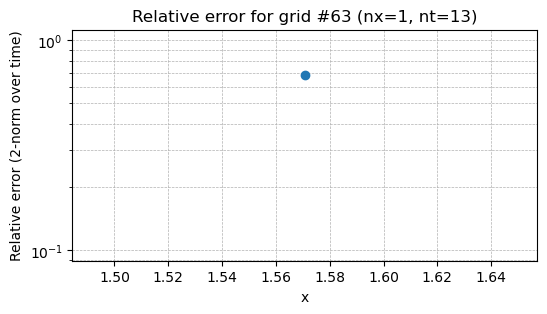

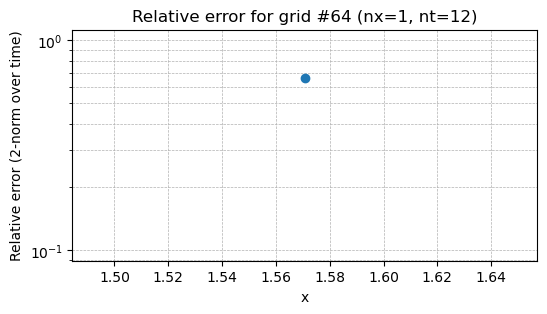

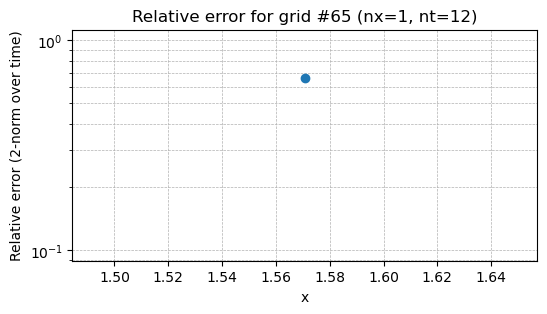

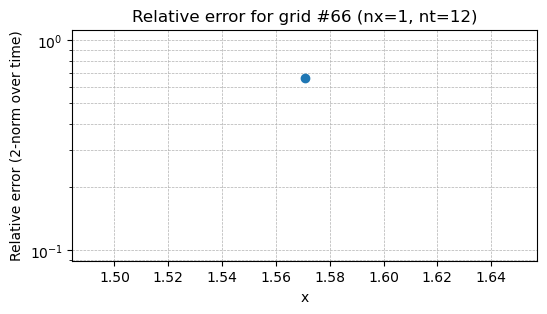

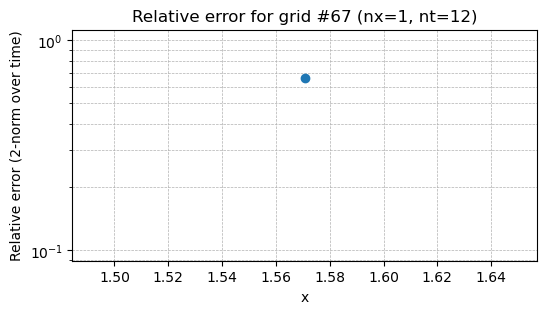

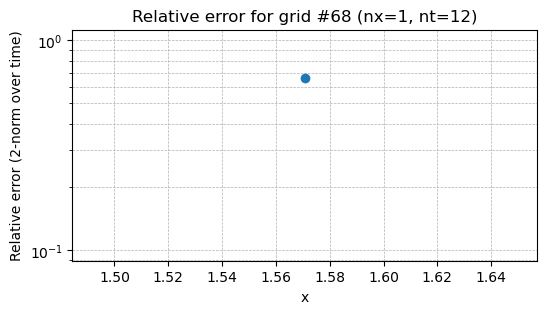

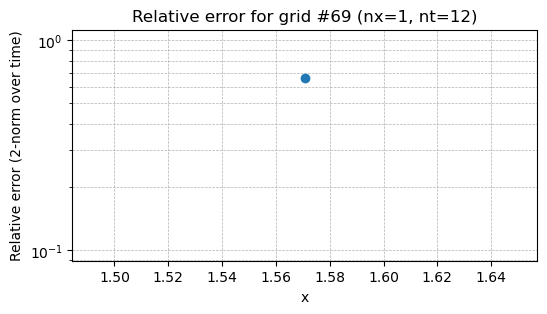

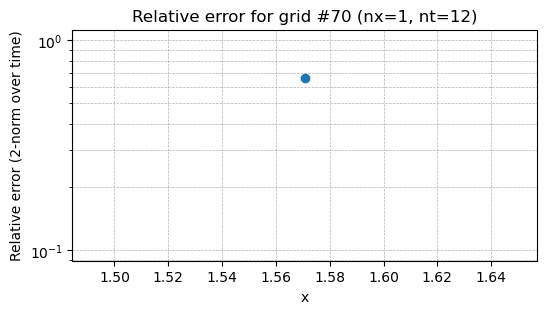

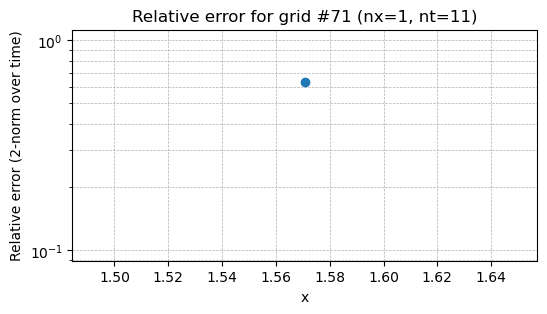

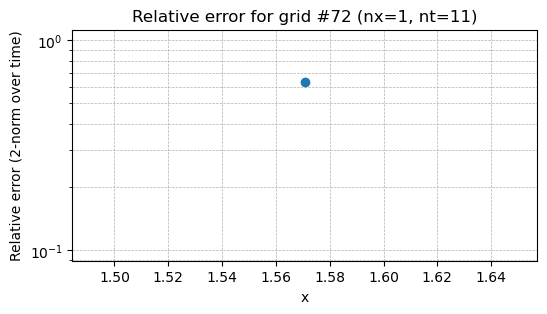

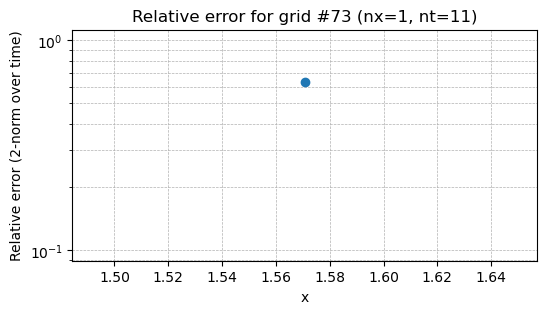

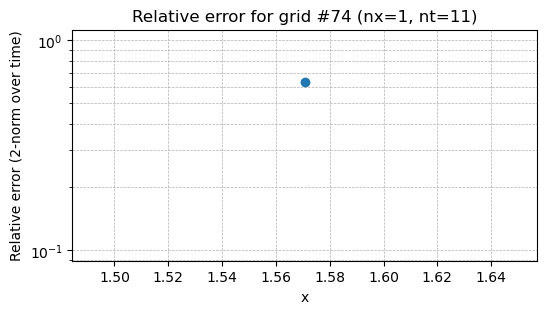

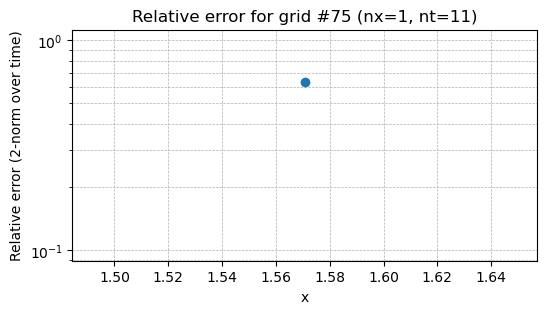

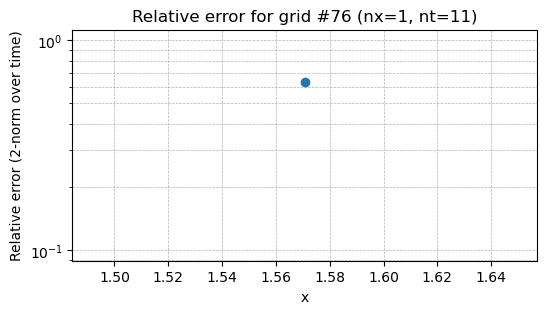

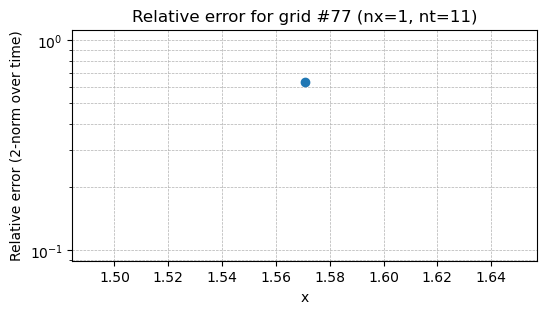

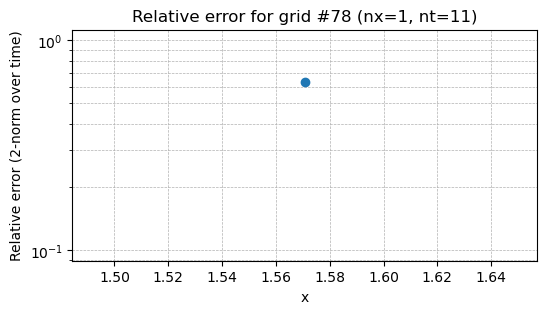

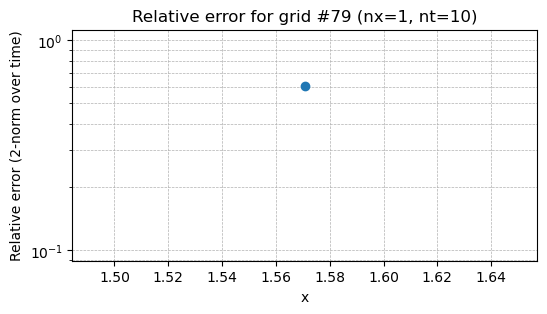

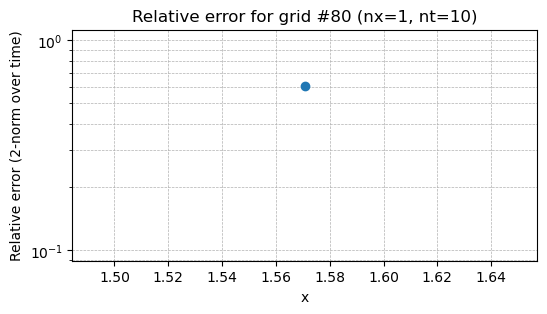

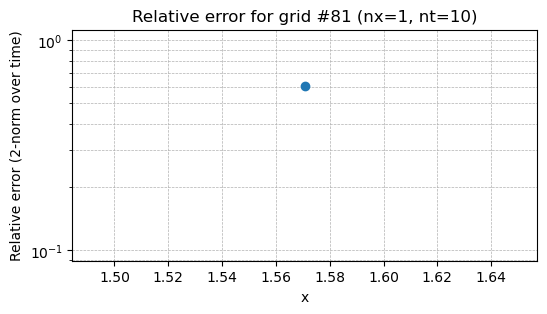

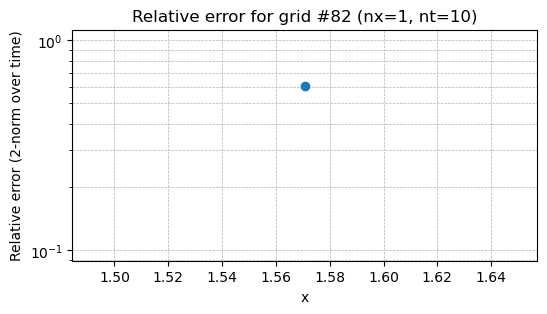

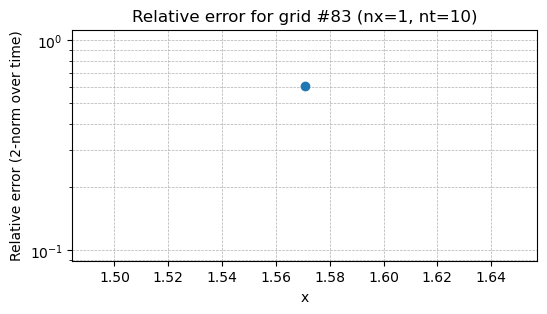

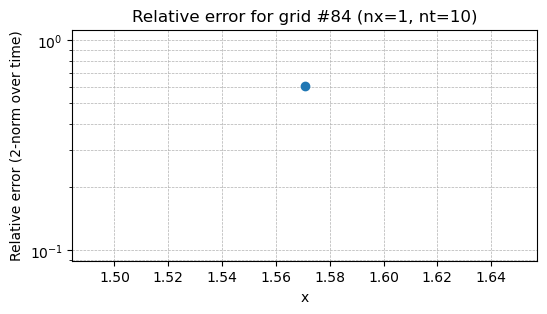

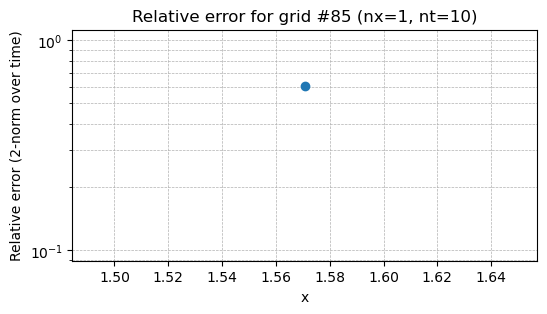

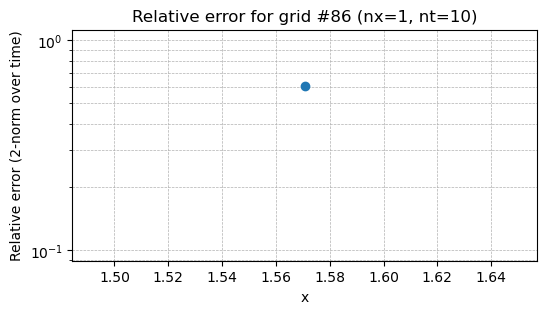

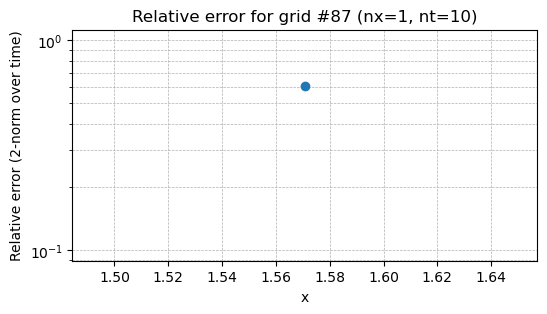

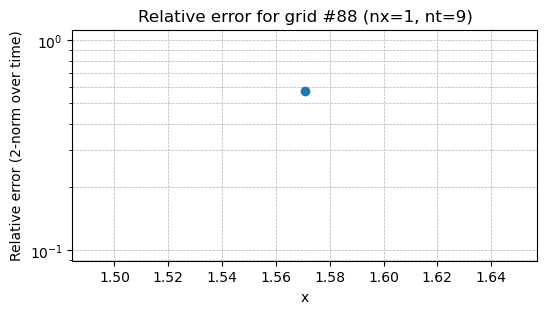

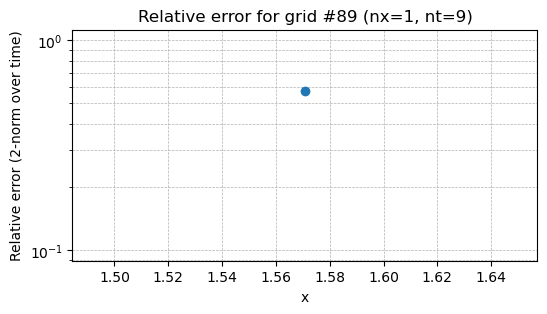

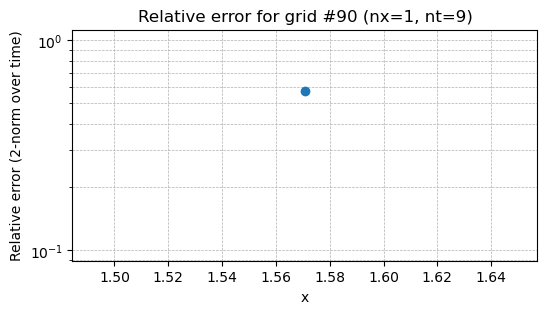

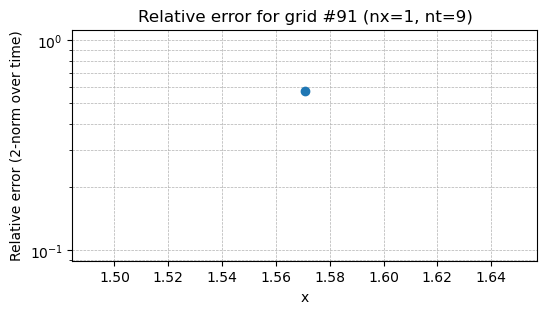

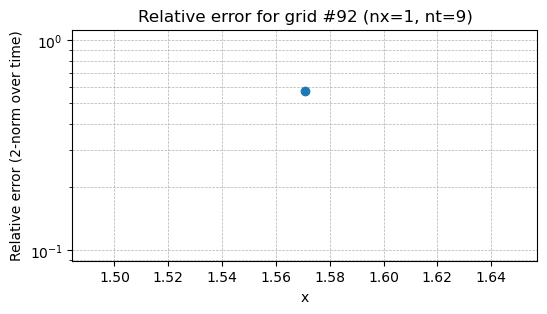

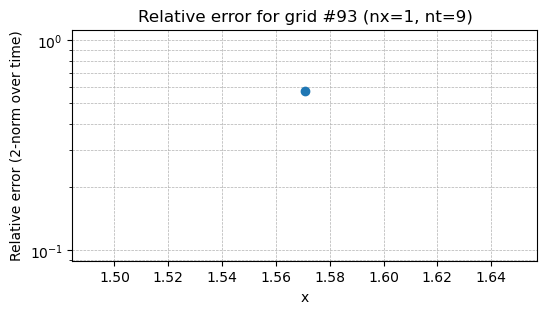

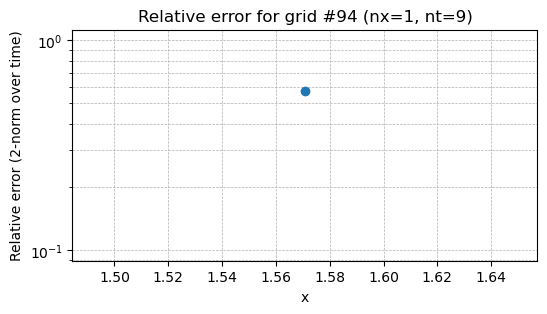

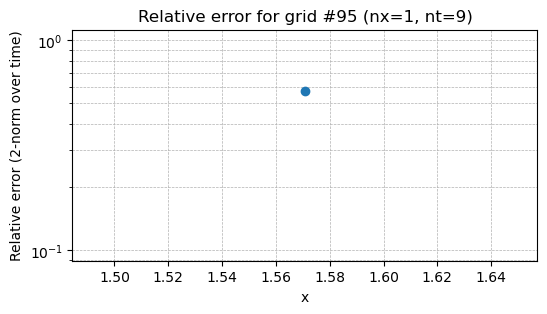

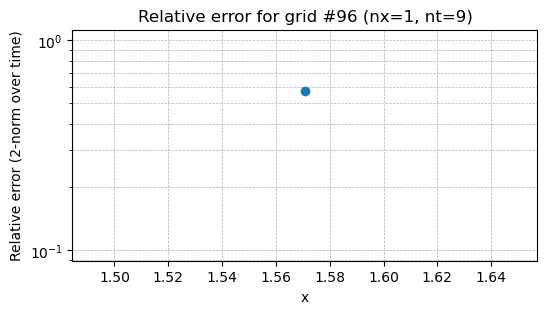

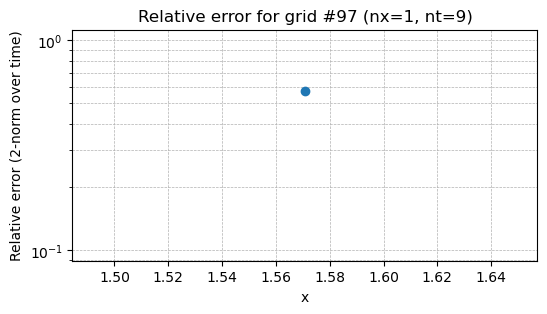

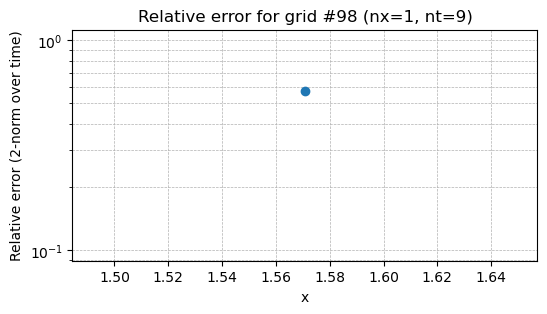

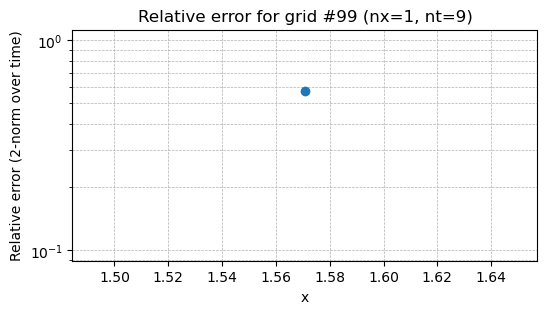

In [6]:
def relative_error(x_grid, t_grid, u_grid, fn):
    gt_samples = np.ndarray([
        [fn(x, t) for t in t_grid[1:-2]]
    for x in x_grid])
    errors = gt_samples - u_grid
    return np.linalg.norm(errors, axis=1) / np.linalg.norm(u_grid, axis=1)


fn = lambda x, t: np.exp(-t) * np.sin(x)

for i, (xg, tg, ug) in enumerate(u_grids):
    # times for columns of ug: initial t=0 plus the t_grid entries used when building ug
    times = np.concatenate(([0.0], tg))
    # Align times to ug columns if needed
    times = times[:ug.shape[1]]
    # analytical grid
    gt = np.array([[fn(x, t) for t in times] for x in xg])
    # error per spatial node (2-norm over time)
    errs = gt - ug
    errs_norm = np.linalg.norm(errs, axis=1)
    gt_norm = np.linalg.norm(gt, axis=1)
    gt_norm[gt_norm == 0] = np.nan  # avoid division by zero
    rel_err = errs_norm / gt_norm

    plt.figure(figsize=(6, 3))
    plt.semilogy(xg, rel_err, marker='o', linestyle='-')
    plt.xlabel('x')
    plt.ylabel('Relative error (2-norm over time)')
    plt.title(f'Relative error for grid #{i} (nx={len(xg)}, nt={ug.shape[1]})')
    plt.grid(True, which='both', ls='--', lw=0.5)
    plt.show()
